# Regression test using 1D Convolution Neural Network

This notebook shows how to use Linear Neural Netorks to perform regression test between two variables. 

The independent variable *x* and the dependent variable *y*

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import OrderedDict,Counter

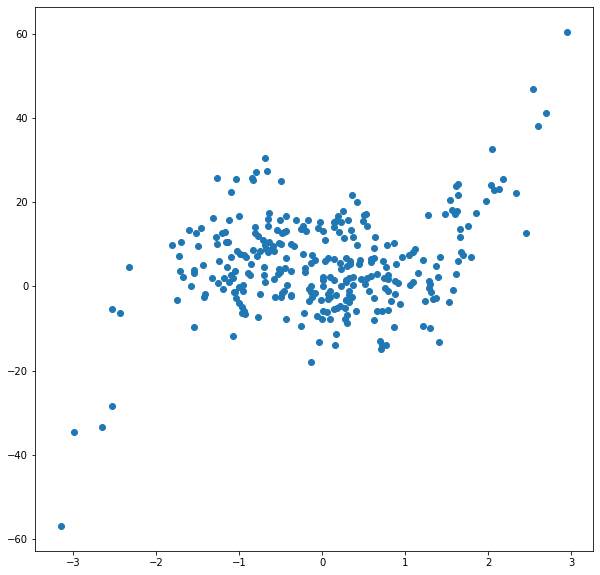

In [2]:
x = torch.randn(300)
y = 2.5 * x**3 + x**2 - 5* x + 3 + 8.5 * torch.randn(300)

plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [3]:
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(OrderedDict([('conv1',nn.Conv1d(1,10,1,bias=False)),
                                                ('bn1',nn.BatchNorm1d(10)),
                                                ('act1',nn.Sigmoid()),
                                                ('conv2',nn.Conv1d(10,100,1,bias=False)),
                                                ('bn2',nn.BatchNorm1d(100)),
                                                ('act1',nn.Sigmoid()),
                                                ('avgpool',nn.AdaptiveMaxPool1d(1)),
                                                ('flat',nn.Flatten())
                                               ]))
        self.layer3 = nn.Linear(in_features=100,out_features=1,bias=True)
        
    def forward(self,x):
        x = self.model(x)
        x = self.layer3(x)
        return x
    
    #Define learning function 
    def learn(self,epochs,x,y,lr):
        loss_fun = nn.MSELoss()
        optimizer = torch.optim.SGD(self.parameters(),lr=lr,momentum=0.9,weight_decay=1e-5)
        losses = []
        for epoch in range(epochs):
            optimizer.zero_grad()
            output = self(x)
            loss = loss_fun(output,y)
            losses.append(loss.item())
            loss.backward()
            if epoch%(epochs/20)==0: print("epoch:{} loss: {}".format(epoch,round(loss.item(),8)))
            optimizer.step()
        return losses
    
    @torch.no_grad()
    def predict(self,x):
        y = self(x)
        return y
                   

In [4]:
net1 = Net1()

In [5]:
X = x.unsqueeze(1);X.unsqueeze_(1);X.shape

torch.Size([300, 1, 1])

In [6]:
net1(X).shape

torch.Size([300, 1])

In [7]:
loss1 = net1.learn(100,X,y.view(-1,1),1e-3)

epoch:0 loss: 165.05126953
epoch:5 loss: 156.85136414
epoch:10 loss: 149.04902649
epoch:15 loss: 140.59275818
epoch:20 loss: 129.88999939
epoch:25 loss: 119.39347839
epoch:30 loss: 96.76582336
epoch:35 loss: 90.71191406
epoch:40 loss: 82.73220062
epoch:45 loss: 80.83123779
epoch:50 loss: 80.4358902
epoch:55 loss: 80.23002625
epoch:60 loss: 80.22789764
epoch:65 loss: 78.24105072
epoch:70 loss: 77.89552307
epoch:75 loss: 77.8129425
epoch:80 loss: 79.44300079
epoch:85 loss: 78.89502716
epoch:90 loss: 78.25364685
epoch:95 loss: 85.40882111


Text(0, 0.5, 'Losses')

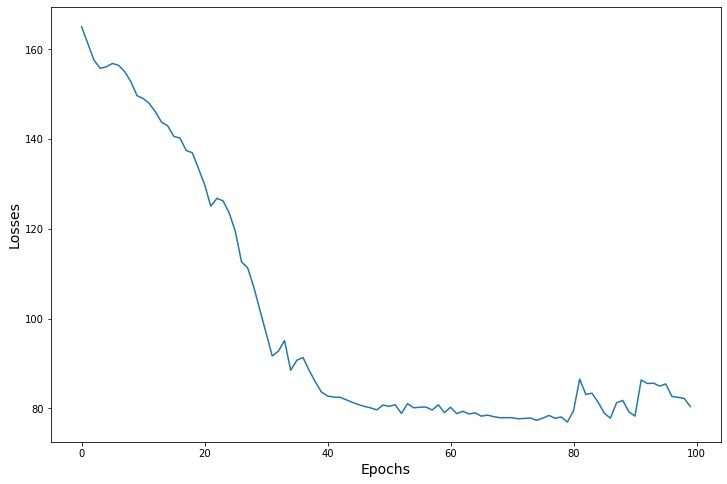

In [9]:
plt.figure(figsize=(12,8))
plt.plot(loss1)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Losses',fontsize=14)

In [8]:
with torch.no_grad():
    y_hat1 = net1(X)

In [10]:
y_hat1.shape

torch.Size([300, 1])

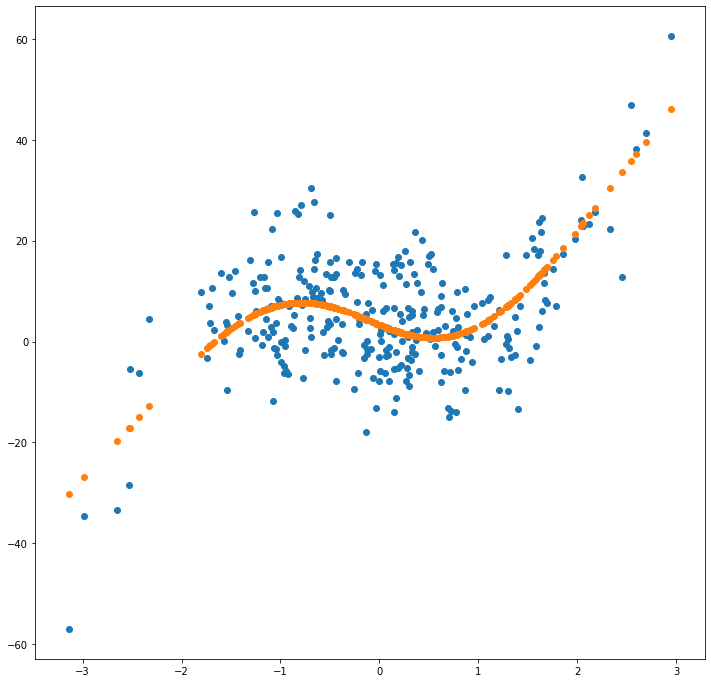

In [11]:
plt.figure(figsize=(12,12))
plt.scatter(x,y)
plt.scatter(X,y_hat1.detach())